# ***AI model that can classify SMS messages as spam or legitimate.***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sms = pd.read_csv("/content/spam.csv", encoding = 'ISO-8859-1')

In [ ]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms.shape

(5572, 5)

In [ ]:
sms.drop_duplicates(inplace=True)

In [ ]:
sms.reset_index(drop=True, inplace=True)

In [ ]:
sms.shape

(5169, 5)

In [ ]:
sms['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

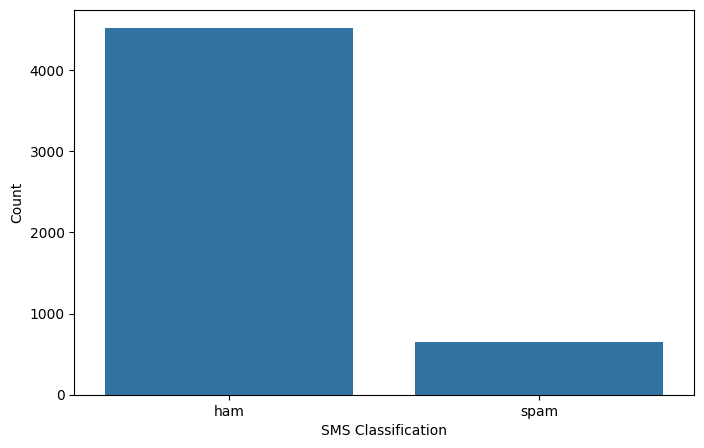

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='v1', data=sms)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms.v2[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = pd.get_dummies(sms['v1'])
y = y.iloc[:, 1].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy score for alpha=0.0 is: 97.58%
Accuracy score for alpha=0.1 is: 98.07%
Accuracy score for alpha=0.2 is: 98.07%
Accuracy score for alpha=0.3 is: 98.16%
Accuracy score for alpha=0.4 is: 98.07%
Accuracy score for alpha=0.5 is: 98.07%
Accuracy score for alpha=0.6 is: 98.07%
Accuracy score for alpha=0.7 is: 98.07%
Accuracy score for alpha=0.8 is: 98.07%
Accuracy score for alpha=0.9 is: 98.16%
Accuracy score for alpha=1.0 is: 98.16%
--------------------------------------------
The best accuracy is 98.16% with alpha value as 0.3


In [ ]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
acc_s = accuracy_score(y_test, y_pred)*100

In [ ]:
print("Accuracy Score {} %".format(round(acc_s,2)))

Accuracy Score 98.07 %


In [ ]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [ ]:
result = ['Wait a minute, this is a SPAM!','Ohhh, this is a normal message.']

In [ ]:
msg = "Hi! You are pre-qulified for Premium SBI Credit Card. Also get Rs.500 worth Amazon Gift Card*, 10X Rewards Point* & more. Click "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Wait a minute, this is a SPAM!


In [ ]:
msg = "priya is prime minister "

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Ohhh, this is a normal message.


In [ ]:
msg = "Your Stock broker FALANA BROKING LIMITED reported your fund balance Rs.1500.5 & securities balance 0.0 as on end of MAY-20 . Balances do not cover your bank, DP & PMS balance with broking entity. Check details at YOGESHNILE.WORK4U@GMAIL.COM. If email Id not correct, kindly update with your broker."

if predict_spam(msg):
    print(result[0])
else:
    print(result[1])

Ohhh, this is a normal message.
